


<h1> TITANIC DATA ANALYTICS USING PYTHON PANDAS AND MATPLOTLIB</h1>

<h3> TRANSEFERRING THE DATASET AND MAKING A COPY OF IT FOR THE PANEL</h3>

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import panel as pn
import hvplot.pandas

df=pd.read_csv('book1.csv', encoding='latin-1')
pn.state.cache['data'] = df.copy()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h3>Data Exploration</h3>

In [78]:
df.shape

(891, 12)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [80]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [81]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [82]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [83]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [84]:
df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].corr()

,Pclass,Age,SibSp,Parch,Fare,Survived
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.338481
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.035322
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225,0.081629
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000,0.257307
Survived,-0.338481,-0.077221,-0.035322,0.081629,0.257307,1.000000


<h3>Handling missing data values</h3>

In [85]:
cab=df['Cabin'].isna().sum()
print("cabin values which are missing: ",cab)

cabin values which are missing:  687


In [86]:
gen=df['Sex'].isna().sum()
print("gender values which are missing: ",gen)

gender values which are missing:  0


In [87]:
age=df['Age'].isna().sum()
print("Age values which are missing: ",age)

Age values which are missing:  177


In [88]:
df['Embarked'] = df['Embarked'].map({ 'S': "Cherbourg" , 'C': "Queenstown" , 'Q': "Southampton" })

In [89]:
a= df['Embarked'].value_counts()
a.name='Port of Embarktion'
print(a)

Embarked
Cherbourg      644
Queenstown     168
Southampton     77
Name: Port of Embarktion, dtype: int64


In [90]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Cherbourg
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Queenstown
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Cherbourg
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Cherbourg
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Cherbourg


In [91]:
embark=df['Embarked'].isnull().sum()
print("embarked/destination values which are missing: ",embark)

embarked/destination values which are missing:  2


<Axes: >

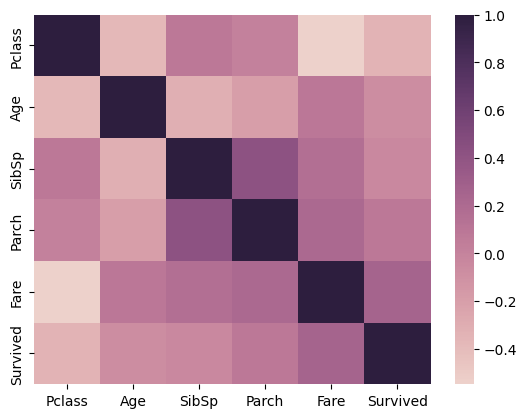

In [92]:
sns.heatmap(df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].corr(),
            cmap=sns.cubehelix_palette(as_cmap=True))

 </BR> <h3> DEALING WITH MISSING VALUES </h3>

In [76]:
df=df.fillna(0)
idf=df.interactive()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,Cherbourg
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Queenstown
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,Cherbourg
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Cherbourg
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,Cherbourg
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,Cherbourg
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Cherbourg
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,Cherbourg
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,Queenstown


</br> <h4>Problem 1 </h4>

In [15]:
sib=df['SibSp'].sum()
print("Number of siblings/spouse present on the ship:",sib)

Number of siblings/spouse present on the ship: 466


</br> <h4>Problem 2 </h4>

In [16]:
class info:
    female = df['Sex'].value_counts()['female']
    male = df['Sex'].value_counts()['male']
    survived_people = df['Survived'].sum()
    total_people=female + male
    died_people = total_people - survived_people

a1= f"ACCORDING TO DATASET: "
    
a2= f"\nTotal number of people: {info.total_people}"
    
a3= f"\nNumber of injured people: {info.survived_people}"
    
a4= f"\nNumber of deaths: {info.died_people}"
    
a5= f"\naboarded number of females: {info.female}"
    
a6= f"\naboarded number of males: {info.male}"

data1= pn.pane.Markdown(a2)
data2= pn.pane.Markdown(a3)
data3= pn.pane.Markdown(a4)
data4= pn.pane.Markdown(a5)
data5= pn.pane.Markdown(a6)

In [17]:
class female:
    survived_female = df.groupby('Sex')['Survived'].value_counts()['female']    

f1= f"\nfemale passengers description: \n {female.survived_female} "

In [18]:
class male:
    survived_male = df.groupby('Sex')['Survived'].value_counts()['male']

m1= f"\nmale passengers description: \n {male.survived_male} "

</br> <h4>Problem: GRAPH BASED ON TYPES OF PEOPLE </h4>

In [20]:
data = pd.DataFrame({'People': ['Boarded', 'Injured', 'Deaths'],
                     'Number': [info.total_people, info.survived_people, info.died_people]})

# Plot the result using hvplot
people_plot = data.hvplot(kind='scatter', x='People', y='Number', marker='o', size=13, color='red') * \
            data.hvplot(kind='line', x='People', y='Number', color='green')

people_plot.opts(xlabel='Types of People', ylabel='Number', title='Number of People', 
                 fontsize={'xlabel': 18, 'ylabel': 16, 'title': 20})
people_plot

:Overlay
   .Scatter.I :Scatter   [People]   (Number)
   .Curve.I   :Curve   [People]   (Number)

</br><h4> Problem: GRAPH BASED ON SURVIVED NUMBER OF FEMALES AND MALES </h4>

In [21]:
# Calculate the number of survived individuals by gender
by_gender = df.groupby('Sex')['Survived'].sum()

# Plot the result using hvplot
survived_plot = by_gender.hvplot(kind='bar', xlabel='Gender', ylabel='Number of Survived Individuals', title='Number of Survived Individuals by Gender', color='green')

survived_plot

:Bars   [Sex]   (Survived)

</br> Problem 4: GRAPH BASED ON SURVIVED PEOPLE ACCORDING TO THEIR AGE GROUPS

In [22]:
# Define age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 70, 100],
                        labels=['Child (0-18)', 'Teenager (18-30)', 'Young Adult (30-50)',
                                'Adult (50-70)', 'Elder Citizen (70-100)'])

# Calculate survival count by age group
by_age = df.groupby('AgeGroup',observed=False)['Survived'].sum()

# Plot the survival rate by age group
ageplot = by_age.hvplot.bar(rot=45, xlabel='Age Group', ylabel='Survival Count',title='Survival Count by Age Group')
ageplot

:Bars   [AgeGroup]   (Survived)

</br> Problem 5: GRAPH BASED ON SURVIVED PEOPLE ACCORDING TO PASSENGER CLASS

In [23]:
# Calculate the survival rate by passenger class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
survival_by_class = survival_by_class*100
# Plot the survival rate by passenger class
survival_by_class_plot = survival_by_class.hvplot(kind='bar', xlabel='Passenger Class', ylabel='Survival Rate',
                                                  title='Survival Rate by Passenger Class')
survival_by_class_plot

:Bars   [Pclass]   (Survived)

</BR> Problem 6: CREATING A PANEL USING TEMPLATE TO MAKE A DASHBOARD TO DISPLAY EVERY GRAPHS IN ONE PLACE

In [21]:

template = pn.template.FastListTemplate(
    title='TITANIC DATA ANALYTICS USING PYTHON PANDAS AND MATPLOTLIB', 
    sidebar=[
        pn.pane.Markdown("# TITANIC DATA ANALYSIS"), 
        pn.pane.Markdown("#### RMS Titanic was a British passenger and mail carrying ocean liner, operated by the White Star Line, that sank in the North Atlantic Ocean on 15 April 1912 as a result of striking an iceberg.The disaster drew public attention, spurred major changes in maritime safety regulations, and inspired many artistic works."), 
        pn.pane.JPG('titanic.jpg', sizing_mode='scale_both')
            ],
    main=[
        pn.pane.Markdown(a1, width=550),
        pn.Row(data1, data2, data3, data4, data5),
        pn.Row(pn.Column(people_plot.opts(width=700),margin=(0, 25))),
        pn.Row(pn.pane.Markdown(f1, width=550), pn.pane.Markdown(m1, width=550)),
        pn.Row(pn.Column(survived_plot.opts(width=700), margin=(0, 25))),
        pn.Row(pn.Column(ageplot.opts(width=600), margin=(0, 25))),
        pn.Row(pn.Column(survival_by_class_plot))
    ])

# Serve the template
template.servable();


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

sns.set(rc={'figure.figsize': (12,10)})
import warnings
warnings.filterwarnings('ignore')